In [1]:
from pystan import StanModel
import pystan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
%matplotlib inline

In [28]:
d = pd.read_csv('data-conc.txt')
data = d.to_dict('list')
data['T'] = len(d)
Time_new = np.arange(25)
data['Time_new'] = list(Time_new)
data['T_new'] = len(Time_new)

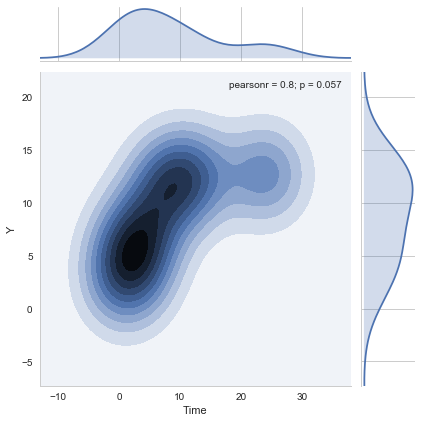

In [5]:
 sns.jointplot("Time", "Y", data=d, kind='kde');

In [8]:
stanmodel = StanModel(file='model7-4.stan')

In [32]:
fit = stanmodel.sampling(data=data,  iter= 5000, seed=123, thin = 5, warmup=500, n_jobs=-1) 

In [33]:
fit

Inference for Stan model: anon_model_335108983e4040c1c3a7c1d31ba88e05.
4 chains, each with iter=5000; warmup=500; thin=5; 
post-warmup draws per chain=900, total post-warmup draws=3600.

             mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
a           13.07    0.02   0.96  11.31   12.7   13.1  13.49   14.7   1658    1.0
b            0.26  6.0e-3   0.23   0.17   0.22   0.24   0.26   0.39   1443    1.0
s_Y          0.91    0.02   0.75   0.36   0.53    0.7   0.99   2.95   1203    1.0
mu[0]        2.84    0.01   0.57   2.22   2.62   2.77   2.95   3.77   1785    1.0
mu[1]        5.02    0.01   0.64   4.09   4.72   4.95   5.22   6.38   2372    1.0
mu[2]        8.05    0.01   0.64   6.87   7.74   8.03   8.33   9.33   3173    1.0
mu[3]       11.08    0.02   0.62   9.86  10.86  11.12  11.35   12.1   1682    1.0
mu[4]       12.26    0.02   0.72   10.9  12.05  12.32  12.59  13.31   1423    1.0
mu[5]       13.01    0.02   0.91  11.29  12.67  13.05  13.42   14.5   1580 

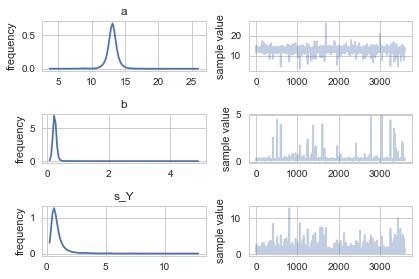

In [34]:
fit.traceplot(pars=['a', 'b', 's_Y']).tight_layout()

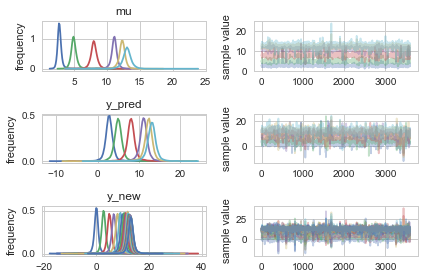

In [36]:
fit.traceplot(pars=['mu', 'y_pred','y_new']).tight_layout()

In [38]:
def stanfit_to_dataframe(fit):
    summary = fit.summary()
    columns = summary['summary_colnames']
    index = summary['summary_rownames']
    data = summary['summary']
    return pd.DataFrame(data, index, columns)

In [49]:
fitdf = stanfit_to_dataframe(fit)
fitdf_mu = fitdf.loc['mu_new[0]': 'mu_new[24]']
fitdf_y = fitdf.loc['y_new[0]': 'y_new[24]']
fitdf_pred = fitdf.loc['y_pred[0]': 'y_pred[5]']

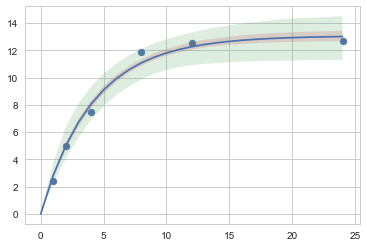

In [41]:
plt.plot(data['Time_new'], fitdf_mu['mean'])
plt.scatter(data['Time'], data['Y'])
plt.fill_between(data['Time_new'], fitdf_mu['2.5%'],  fitdf_mu['97.5%'], alpha=0.2)
plt.fill_between(data['Time_new'], fitdf_mu['25%'],  fitdf_mu['75%'], alpha=0.2)

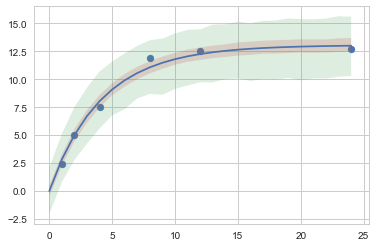

In [45]:
plt.plot(data['Time_new'], fitdf_mu['mean'])
plt.scatter(data['Time'], data['Y'])
plt.fill_between(data['Time_new'], fitdf_y['2.5%'],  fitdf_y['97.5%'], alpha=0.2)
plt.fill_between(data['Time_new'], fitdf_y['25%'],  fitdf_y['75%'], alpha=0.2)

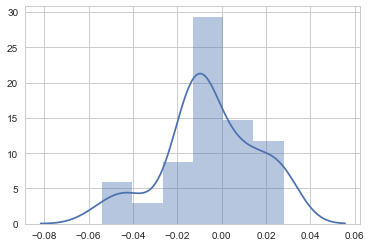

In [46]:
sns.distplot(fitdf_y['mean'].values -  fitdf_mu['mean'].values);

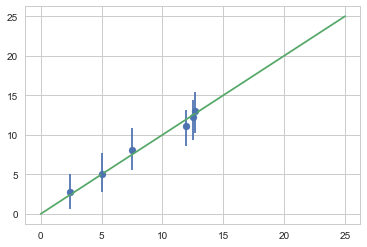

In [50]:
plt.scatter(d.Y, fitdf_pred["mean"])
dy_1 = fitdf_pred['50%'] - fitdf_pred['2.5%']
dy_2 = fitdf_pred['97.5%'] - fitdf_pred['50%']
plt.errorbar(d.Y, fitdf_pred["mean"], yerr=[dy_1, dy_2], fmt='.');
plt.plot(np.linspace(0, 25), np.linspace(0, 25))